# **Seatwork 11.1 Exploratory Data Analysis for Machine Learning**

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
automobile = fetch_ucirepo(id=10)
# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

In [3]:
X

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


In [4]:
y

,symboling
0,3
1,3
2,1
3,2
4,2
...,...
200,-1
201,-1
202,-1
203,-1


In [6]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.2 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [8]:
df = pd.concat([X, y], axis = 1)
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


# **Cleaning**

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64


In [14]:
null_columns = []
for x in df.columns:
    if df[x].isnull().any():
        null_columns.append(x)

In [15]:
null_columns

['price',
 'peak-rpm',
 'horsepower',
 'stroke',
 'bore',
 'num-of-doors',
 'normalized-losses']

In [19]:
for x in null_columns:
  df[x] = df[x].fillna(df[x].mean())

In [20]:
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,122.0,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [22]:
 df.isnull().sum()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

#Linear Regression annalyis

In [23]:
df.columns

Index(['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower',
       'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size',
       'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width',
       'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style',
       'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses',
       'symboling'],
      dtype='object')

In [24]:
df.head(20)

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.000000,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0,3
1,16500.000000,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,122.0,3
2,16500.000000,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,122.0,1
3,13950.000000,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.000000,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
5,15250.000000,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,99.8,front,fwd,sedan,2.0,std,gas,audi,122.0,2
6,17710.000000,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0,1
7,18920.000000,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,wagon,4.0,std,gas,audi,122.0,1
8,23875.000000,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0,1
9,13207.129353,22,16,5500.0,160.0,7.0,3.40,3.13,mpfi,131,...,99.5,front,4wd,hatchback,2.0,turbo,gas,audi,122.0,0


In [25]:
df.describe()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7868.768212,6.886443,6.542142,476.979093,39.519211,3.972040,0.313597,0.270844,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.989952,31.681008,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7788.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,101.000000,0.000000
50%,10595.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,122.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.580000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,137.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           205 non-null    float64
 4   horsepower         205 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             205 non-null    float64
 7   bore               205 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

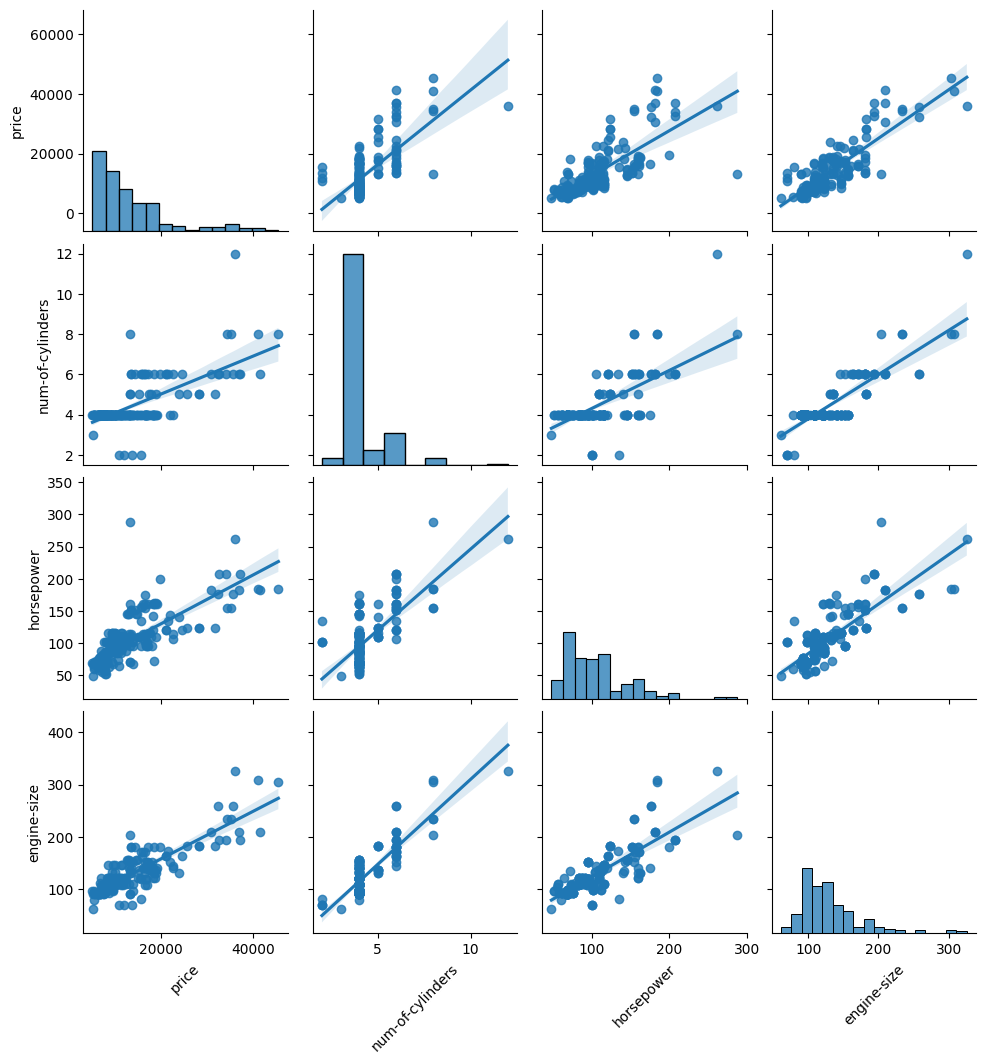

In [29]:
pairplot = sns.pairplot(df[['price', 'num-of-cylinders', 'horsepower', 'engine-size']], kind='reg')

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)

plt.show()

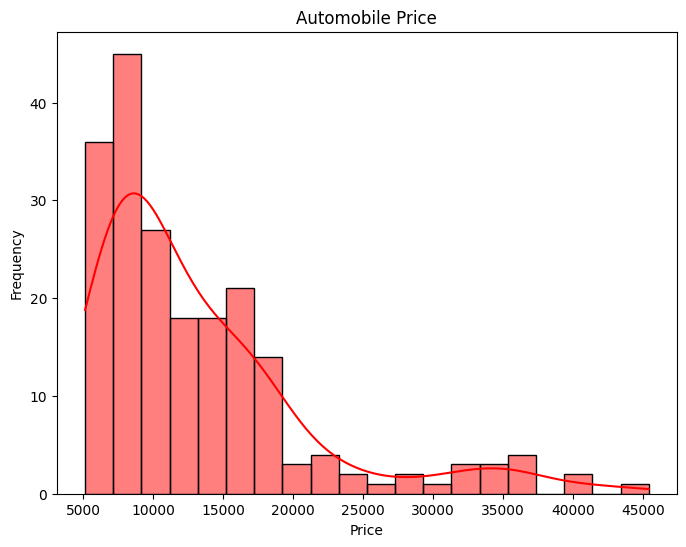

In [30]:
import matplotlib.pyplot as plt

# Plotting the histogram for automobile prices
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=20, kde=True, color='red')
plt.title('Automobile Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

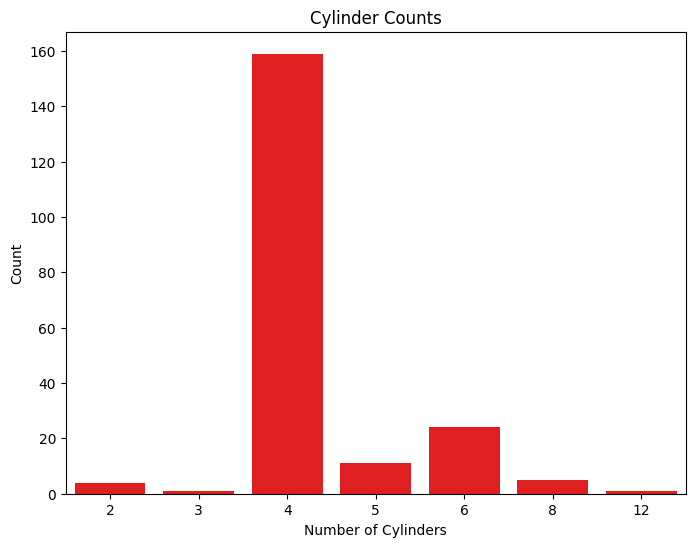

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='num-of-cylinders', color='red',data=df)
plt.title('Cylinder Counts')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.show()

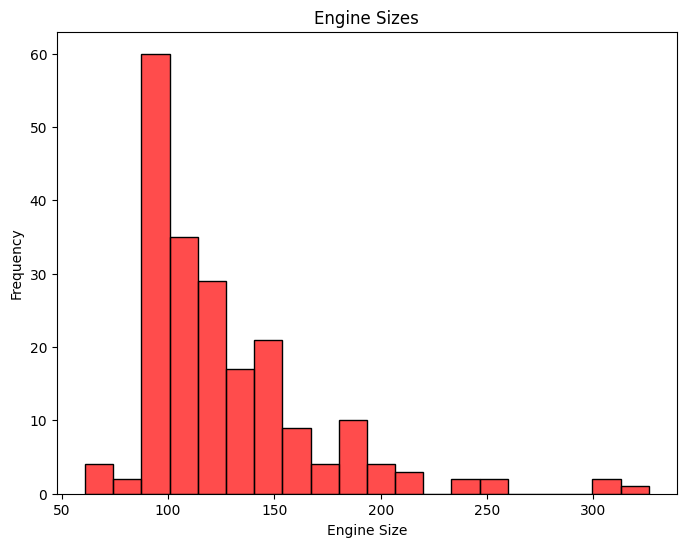

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(df['engine-size'], bins=20, color='red', alpha=0.7)

plt.title('Engine Sizes')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')

plt.show()

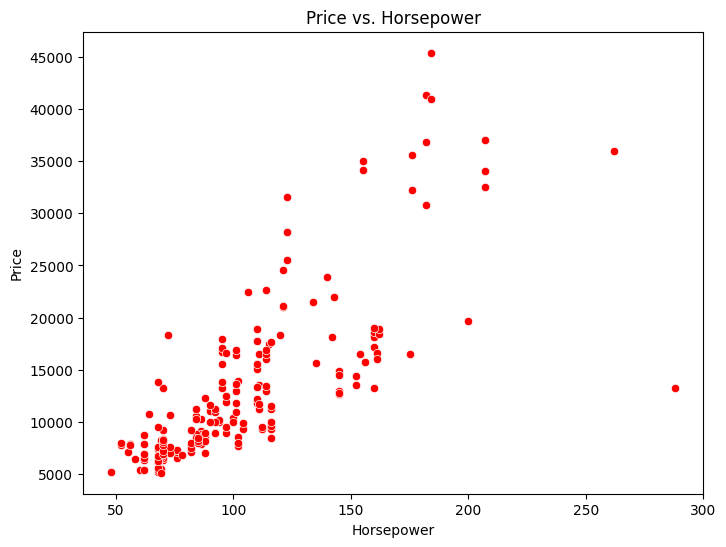

In [36]:
# Create scatterplot for Price vs. Horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=df, color='red')
plt.title('Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

indicate that cars with higher horsepower tend to be more expensive

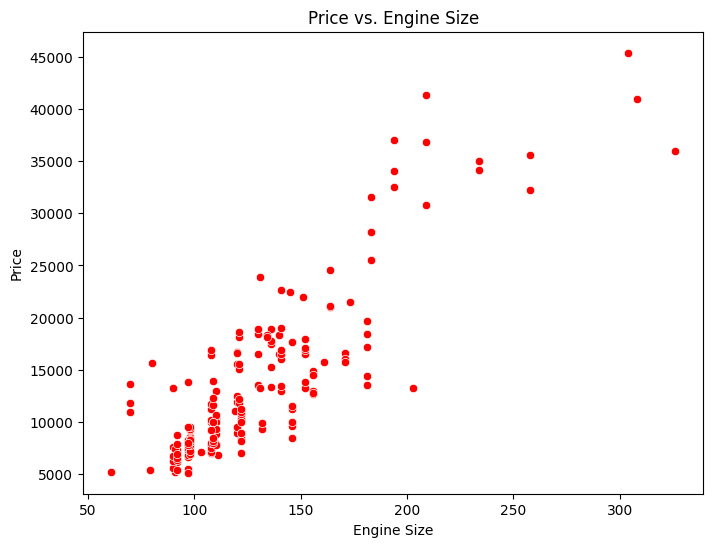

In [37]:
# Create scatterplot for Price vs. Engine Size
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='price', data=df, color='red')
plt.title('Price vs. Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

larger engines can be more expensive.

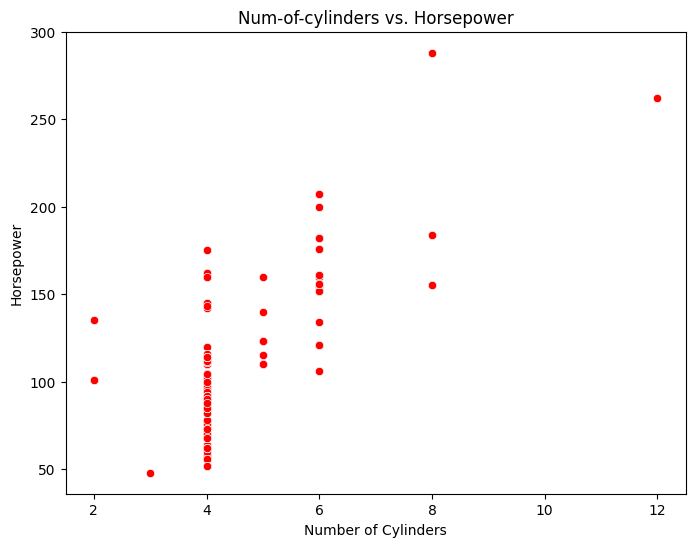

In [38]:
# Create scatterplot for Num-of-cylinders vs. Horsepower
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num-of-cylinders', y='horsepower', data=df, color='red')
plt.title('Num-of-cylinders vs. Horsepower')
plt.xlabel('Number of Cylinders')
plt.ylabel('Horsepower')
plt.show()

automobile with more cylinders have higher horsepower.

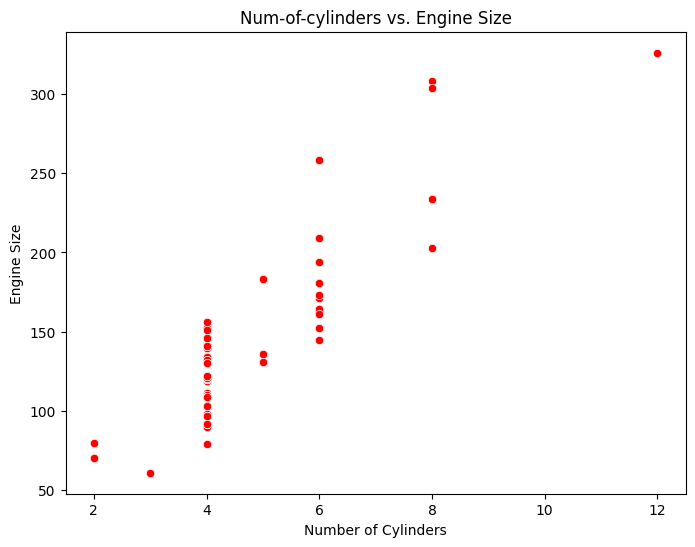

In [39]:
# Create scatterplot for Num-of-cylinders vs. Engine Size
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num-of-cylinders', y='engine-size', data=df, color='red')
plt.title('Num-of-cylinders vs. Engine Size')
plt.xlabel('Number of Cylinders')
plt.ylabel('Engine Size')
plt.show()

 manufacturers tend to increase engine size by adding more cylinders

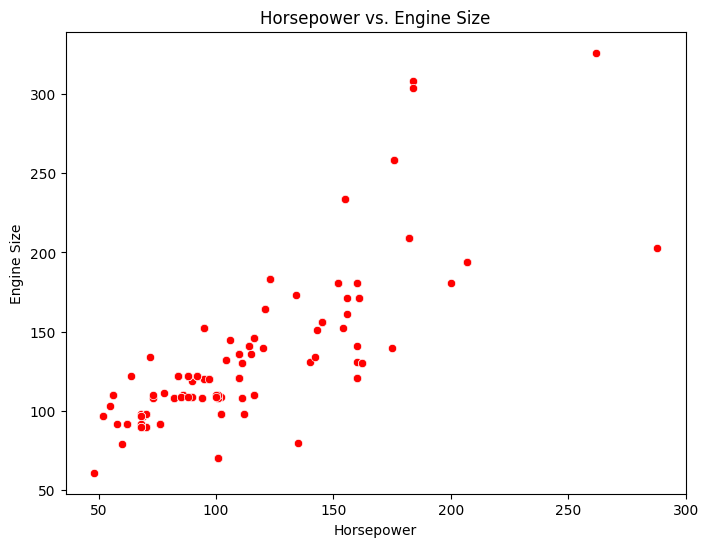

In [40]:
# Create scatterplot for Horsepower vs. Engine Size
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='engine-size', data=df, color='red')
plt.title('Horsepower vs. Engine Size')
plt.xlabel('Horsepower')
plt.ylabel('Engine Size')
plt.show()

helps determine that larger engine sizes tend to produce higher horsepower outputs.

In [44]:
print("X =", X.shape,"\nY =", y.shape)

X = (205, 25) 
Y = (205, 1)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape

(164, 3)

In [78]:
X_test.shape

(41, 3)

In [80]:
model = LinearRegression()

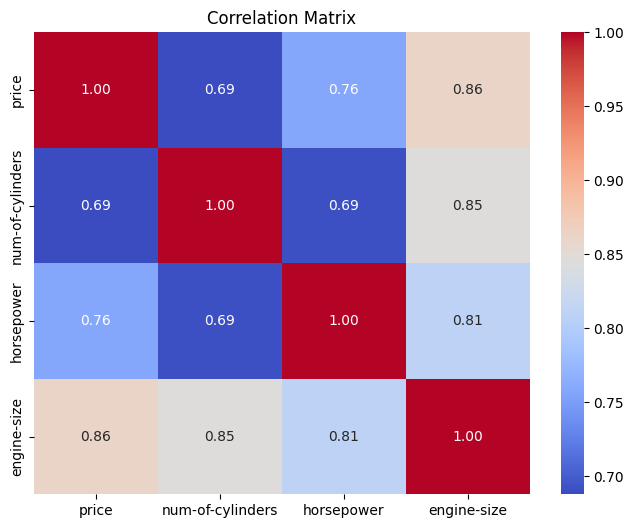

In [67]:
correlation_matrix = df[['price', 'num-of-cylinders', 'horsepower', 'engine-size']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


##**Price vs. num-of-cylinders (0.687770): There is a moderately positive correlation between the price and the number of cylinders in the engine.**

More cylinders often mean larger and more powerful engine, which can result in a higher price for the vehicle.

##**Price vs. horsepower (0.757917): There is a strong positive correlation between the price and the horsepower of the car.**

Higher horsepower is often will be better performance, which can justify a higher price tag for the car.

##**Price vs. engine-size (0.861752): There is a very strong positive correlation between the price and the engine size.**

Larger engines typically have more power and can offer better performance, leading to higher prices.

##**Num-of-cylinders vs. horsepower (0.691208): There is a moderately positive correlation between the number of cylinders and the horsepower of the car.**

More cylinders generally mean more power generated by the engine, resulting in higher horsepower.

##**Num-of-cylinders vs. engine-size (0.846031): There is a strong positive correlation between the number of cylinders and the engine size.**

More cylinders mean a larger total displacement of the engine, which leads to a larger engine size.

##**Horsepower vs. engine-size (0.810713): There is a strong positive correlation between the horsepower and the engine size.**

A larger engine size allows for more fuel, resulting in higher power output.

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['num-of-cylinders', 'horsepower', 'engine-size']]
y = df['price']

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 16171180.212878957
Coefficients: [-1201.27854017    37.88655387   157.55524143]
Intercept: -5478.095778018269


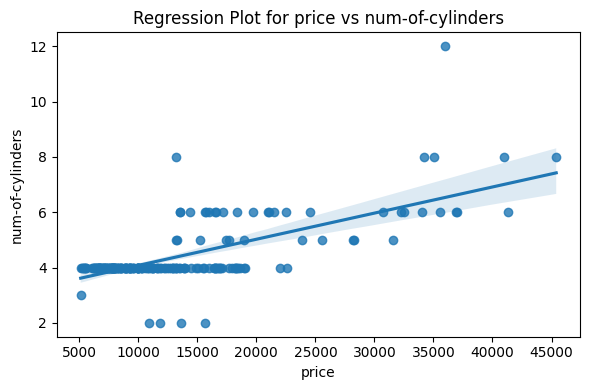

In [92]:
# Scatter plot with regression line for price vs num-of-cylinders
plt.figure(figsize=(6, 4))
sns.regplot(x='price', y='num-of-cylinders', data=df)
plt.title('Regression Plot for price vs num-of-cylinders')
plt.xlabel('price')
plt.ylabel('num-of-cylinders')
plt.tight_layout()
plt.show()

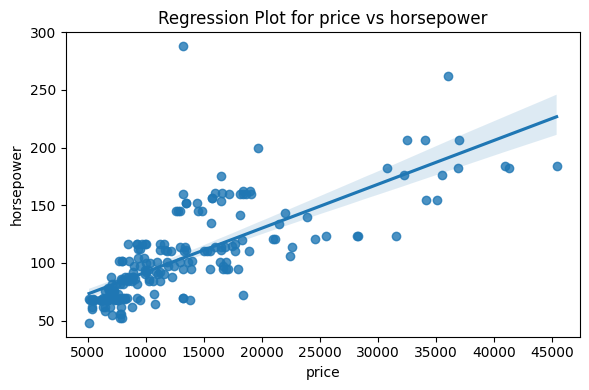

In [93]:
# Scatter plot with regression line for price vs horsepower
plt.figure(figsize=(6, 4))
sns.regplot(x='price', y='horsepower', data=df)
plt.title('Regression Plot for price vs horsepower')
plt.xlabel('price')
plt.ylabel('horsepower')
plt.tight_layout()
plt.show()


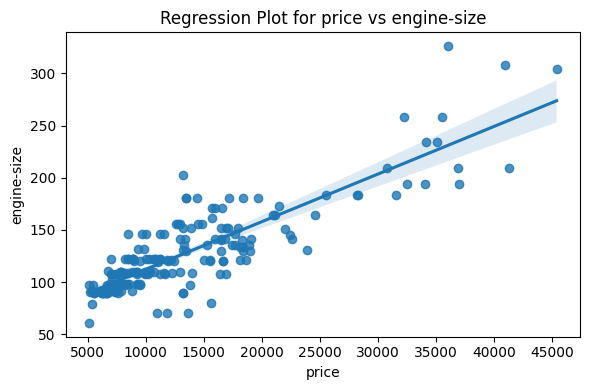

In [94]:
# Scatter plot with regression line for price vs engine-size
plt.figure(figsize=(6, 4))
sns.regplot(x='price', y='engine-size', data=df)
plt.title('Regression Plot for price vs engine-size')
plt.xlabel('price')
plt.ylabel('engine-size')
plt.tight_layout()
plt.show()


According to the graphs that the larger and more powerful the automobile tend to be have higher prices.